![example](images/director_shot.jpeg)

# Microsoft Film Performance Analysis

**Authors:** Ian Musau
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft is looking to endavour into the film industry and would like analysis on the types of films 
that would be the most profitable to create. By profiling the genres most likely to succeed, the risk factor 
is reduced for the new studio.

This will be accomplished by answering the following questions:
- Which film genres perform the best at the box office?
- Which film genres receive the highest ratings by viewers?
- Which movies present the highest return on investment when budget and box office performance are compared?
- Which themes are most represented among the most successful movies?


These questions will give a solid understanding of how different genres tend to perform at theaters. Once
answered, Microsoft will easily be able to judge the most prudent genres to venture into.

## Data Understanding

The data used in this analysis was sourced from IMDb, The Movie Database and
The Numbers. The datasets contain information about films. A multitude 
useful data is in the datatsets including box office performance, ratings by viewers and 
budgets.

The main point of focus will be the genres of the movies. Grouping by genre and the comparing 
metrics such as box office performance and viewer ratings will give insight as to best kinds 
of movies the studio can pursue.

In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
from matplotlib import rcParams


%matplotlib inline

conn = sqlite3.connect('data/im.db')
cursor = conn.cursor

#### Exploring IMDb dataset ####

In [4]:
#Finding table names in IMDb database
imdb_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table';", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
#inspecting the movie basics information
imdb_basics_df = pd.read_sql("SELECT * FROM movie_basics", conn)
print(imdb_basics_df.info())
imdb_basics_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [6]:
#inspecting movie_ratings table
imdb_ratings_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
print(imdb_ratings_df.info())
imdb_ratings_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


#### Exploring TheMovieDB Dtataset ####

In [7]:
#inspecting tmdb.movies.csv
tmdb_movie_df = pd.read_csv("data/tmdb.movies.csv")
print(tmdb_movie_df.info())
tmdb_movie_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


### Exploring The Numbers Dataset ####

In [8]:
#inspecting tn.movie_budgets.csv
def load_tn():
    return pd.read_csv("data/tn.movie_budgets.csv")

tn_budgets_df = load_tn()
print(tn_budgets_df.info())

tn_budgets_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

#### Creating combined dataset

Gathering ratings

In [9]:
#remove duplicates
def remove_combined_duplicates():
    combined_film_df.drop_duplicates(subset="name", keep="first", inplace=True)

#combining the IMDb tables first
combined_film_df = imdb_basics_df[["movie_id","primary_title", "genres", "start_year"]].copy()
combined_film_df.rename(columns={"primary_title" : "name"}, inplace=True)
combined_film_df.name = combined_film_df.name.str.strip()
remove_combined_duplicates()
combined_film_df.rename(columns={"start_year" : "year"}, inplace=True)
combined_film_df = pd.merge(combined_film_df, imdb_ratings_df, on = ["movie_id"], how = "right")
combined_film_df.rename(columns={"averagerating" : "imdb_rating"}, inplace=True)
#number of votes unnecessary
combined_film_df.drop("numvotes", axis = 1, inplace=True)



#adding ratings from The Movie Database
#renaming movie title column for simpler merging
tmdb_movie_df.rename(columns={"original_title" : "name"}, inplace=True)
combined_film_df = pd.merge(combined_film_df, tmdb_movie_df, on = ["name"], how = "right")
combined_film_df.drop([
    "movie_id", "Unnamed: 0", "genre_ids", "id", "original_language", "popularity", "release_date",
    "title", "vote_count"
], axis = 1, inplace = True)
combined_film_df.rename(columns={"vote_average" : "moviedb_rating"}, inplace=True)
combined_film_df.dropna(inplace=True)

#remove the few movies that don't have a rating on movie_db
combined_film_df = combined_film_df[combined_film_df.moviedb_rating != 0]

print("Dataset Size: ",len(combined_film_df))
combined_film_df.head(2)

Dataset Size:  14138


,name,genres,year,imdb_rating,moviedb_rating
0,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery",2010.0,7.7,7.7
1,How to Train Your Dragon,"Action,Adventure,Animation",2010.0,8.1,7.7


Gathering monetary information

In [10]:
#removing "$" and commas from money values
def str_to_float_in_m(column):
    converted = column.str.replace("$", "")
    converted = converted.str.replace(",", "")
    converted = in_millions(converted)
    return converted
#converting to float in millions
def in_millions(column):
    column = round(column.astype(float) / 1000000, 2)
    return column

tn_budgets_df = load_tn()
tn_budgets_df.domestic_gross = str_to_float_in_m(tn_budgets_df.domestic_gross)
tn_budgets_df.worldwide_gross = str_to_float_in_m(tn_budgets_df.worldwide_gross)
tn_budgets_df.production_budget = str_to_float_in_m(tn_budgets_df.production_budget)
#load money values
tn_budgets_df.rename(columns={"movie" : "name"}, inplace=True)
combined_film_df = pd.merge(combined_film_df, tn_budgets_df, on = ["name"], how = "left")
combined_film_df.drop(["id", "release_date"], axis=1, inplace=True)
combined_film_df.dropna(inplace=True)

remove_combined_duplicates()
combined_film_df.head(2)

,name,genres,year,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross
1,How to Train Your Dragon,"Action,Adventure,Animation",2010.0,8.1,7.7,165.0,217.58,494.87
2,Iron Man 2,"Action,Adventure,Sci-Fi",2010.0,7.0,6.8,170.0,312.43,621.16


#### Feature Engineering
Adding a column for ROI (Return On Investment) by calculating net profit and dividing by budget as a percentage.

In [11]:
print("Dataset Size: ",len(combined_film_df))
#calculating return on investment (net profit / cost * 100)
gross = combined_film_df.worldwide_gross
budget = combined_film_df.production_budget
combined_film_df["ROI"] = (gross - budget)/budget * 100
combined_film_df.sort_values("worldwide_gross", ascending=False).head(2)

Dataset Size:  1680


,name,genres,year,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross,ROI
5,Avatar,Horror,2011.0,6.1,7.4,425.0,760.51,2776.35,553.258824
12688,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018.0,8.5,8.3,300.0,678.82,2048.13,582.710000


Genres are then split into a list of strings so each movie can contribute to its various genres in visualization. Note the name and
genre columns.

In [12]:
combined_film_df.genres = combined_film_df.genres.str.split(",")
exploded_genre_df = combined_film_df.explode("genres")
exploded_genre_df.head(5)

,name,genres,year,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross,ROI
1,How to Train Your Dragon,Action,2010.0,8.1,7.7,165.0,217.58,494.87,199.921212
1,How to Train Your Dragon,Adventure,2010.0,8.1,7.7,165.0,217.58,494.87,199.921212
1,How to Train Your Dragon,Animation,2010.0,8.1,7.7,165.0,217.58,494.87,199.921212
2,Iron Man 2,Action,2010.0,7.0,6.8,170.0,312.43,621.16,265.388235
2,Iron Man 2,Adventure,2010.0,7.0,6.8,170.0,312.43,621.16,265.388235


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [13]:
exploded_genre_df.describe()

,year,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross,ROI
count,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000
mean,2013.489663,6.259279,6.184567,44.367709,54.537231,138.639930,265.594820
std,2.462293,1.076205,1.000479,56.287916,86.055642,239.493898,1264.383106
min,2010.000000,1.600000,0.500000,0.010000,0.000000,0.000000,-100.000000
25%,2011.000000,5.700000,5.700000,7.000000,2.007500,5.515000,-45.000000
50%,2013.000000,6.400000,6.200000,22.000000,24.820000,45.710000,91.650000
75%,2015.000000,7.000000,6.800000,56.400000,65.000000,151.720000,287.347917
max,2019.000000,9.200000,10.000000,425.000000,760.510000,2776.350000,41560.000000


The combined (non-genre-exploded) dataset is used to explore budget vs worldwide gross.

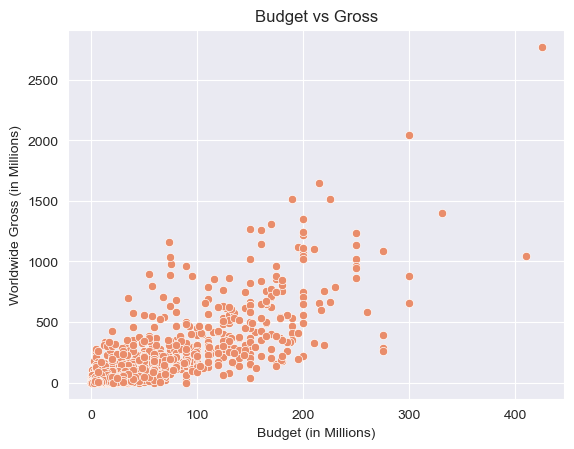

In [14]:
sns.set_style('darkgrid')
sns.set_palette('flare')
# Here you run your code to model the data
ax = sns.scatterplot(
    data = combined_film_df,
    x = combined_film_df.production_budget,
    y= combined_film_df.worldwide_gross,
)
rcParams['figure.figsize'] = 15, 8
ax.set_title("Budget vs Gross")
ax.set_xlabel("Budget (in Millions)")
ax.set_ylabel("Worldwide Gross (in Millions)");

# DELETE THIS LATER

In [49]:
gen = ["horror"]
subset = exploded_genre_df[exploded_genre_df.genres.str.lower().isin(gen)]
print(subset.worldwide_gross.mean())
subset.sort_values("ROI", ascending=False).head(20)

66.26080357142857


,name,genres,year,imdb_rating,moviedb_rating,production_budget,domestic_gross,worldwide_gross,ROI
7415,The Gallows,Horror,2015.0,4.2,4.8,0.10,22.76,41.66,41560.000000
2549,The Devil Inside,Horror,2012.0,4.2,4.7,1.00,53.26,101.76,10076.000000
1063,Insidious,Horror,2010.0,6.9,6.9,1.50,54.01,99.87,6558.000000
7462,Unfriended,Horror,2014.0,5.6,5.4,1.00,32.79,64.36,6336.000000
159,Paranormal Activity 2,Horror,2010.0,5.7,5.7,3.00,84.75,177.51,5817.000000
712,Get Out,Horror,2017.0,7.7,5.5,5.00,176.04,255.37,5007.400000
2393,Chernobyl Diaries,Horror,2012.0,5.0,5.0,1.00,18.12,42.41,4141.000000
1169,Paranormal Activity 3,Horror,2011.0,5.8,5.9,5.00,104.03,207.04,4040.800000
5560,Annabelle,Horror,2014.0,5.4,5.6,6.50,84.27,256.86,3851.692308
118,The Last Exorcism,Horror,2010.0,5.6,5.6,1.80,41.03,70.17,3798.333333


# /DELETE

#### Genre performance analysis
The genre column in exploded so that movies that belong to multiple genres can contribute to all associated genres.

In [53]:
#return bar plot for specific column grouped by genre
def view_column_by_genre(column, title, ylabel):
    ax = sns.catplot(
        data= exploded_genre_df,
        x = exploded_genre_df.genres,
        y= exploded_genre_df[column],
        kind="bar",
        height = 9,
        aspect=2,
        order = sorted(exploded_genre_df.genres.unique()),
        estimator="median"
    )
    ax.set_xlabels("Genre")
    ax.set_ylabels(ylabel)
    ax.figure.suptitle(title)

    return ax

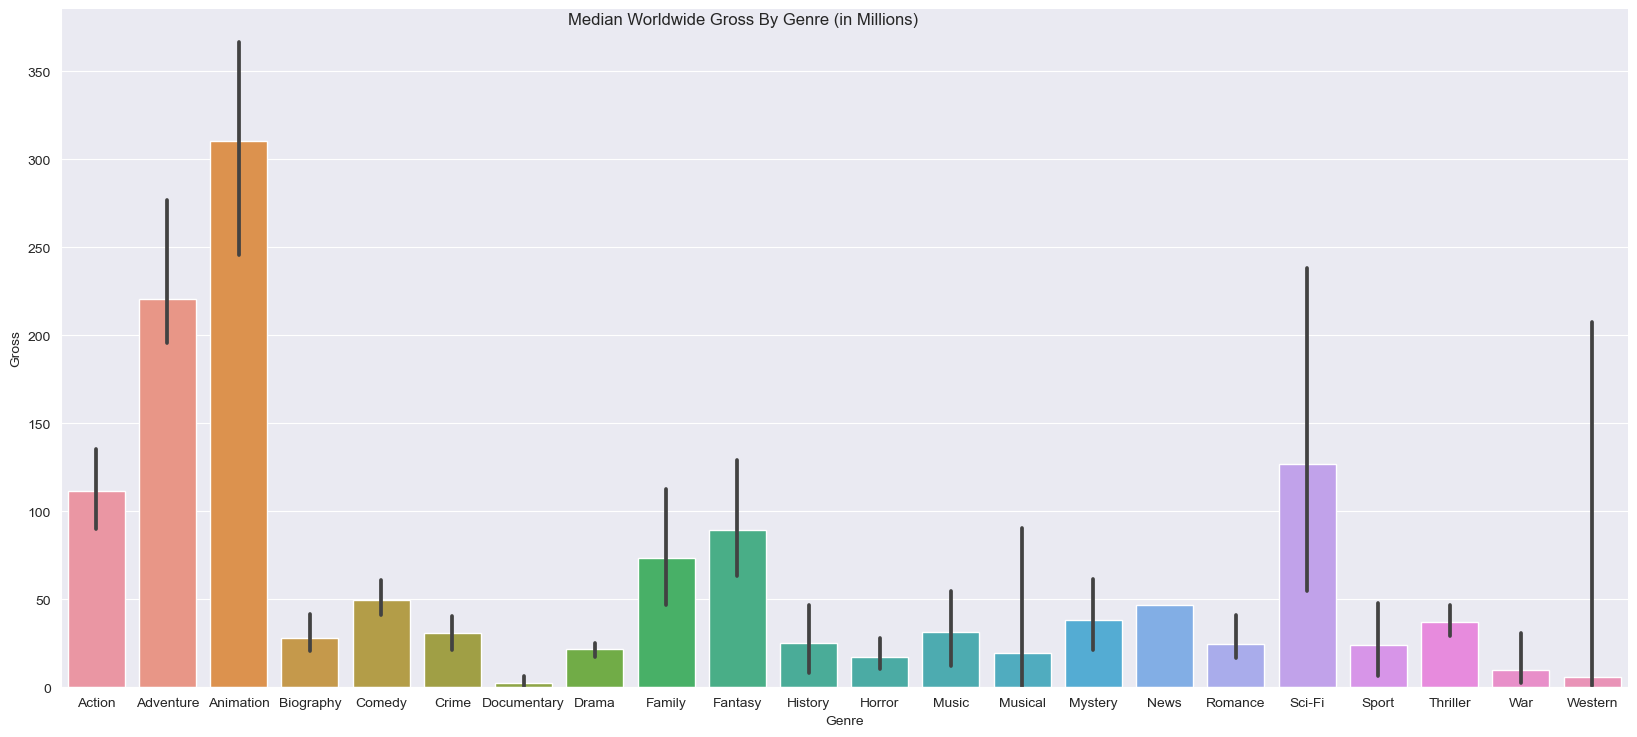

In [58]:
view_column_by_genre(
    "worldwide_gross",
    "Median Worldwide Gross By Genre (in Millions)",
    "Gross"
);

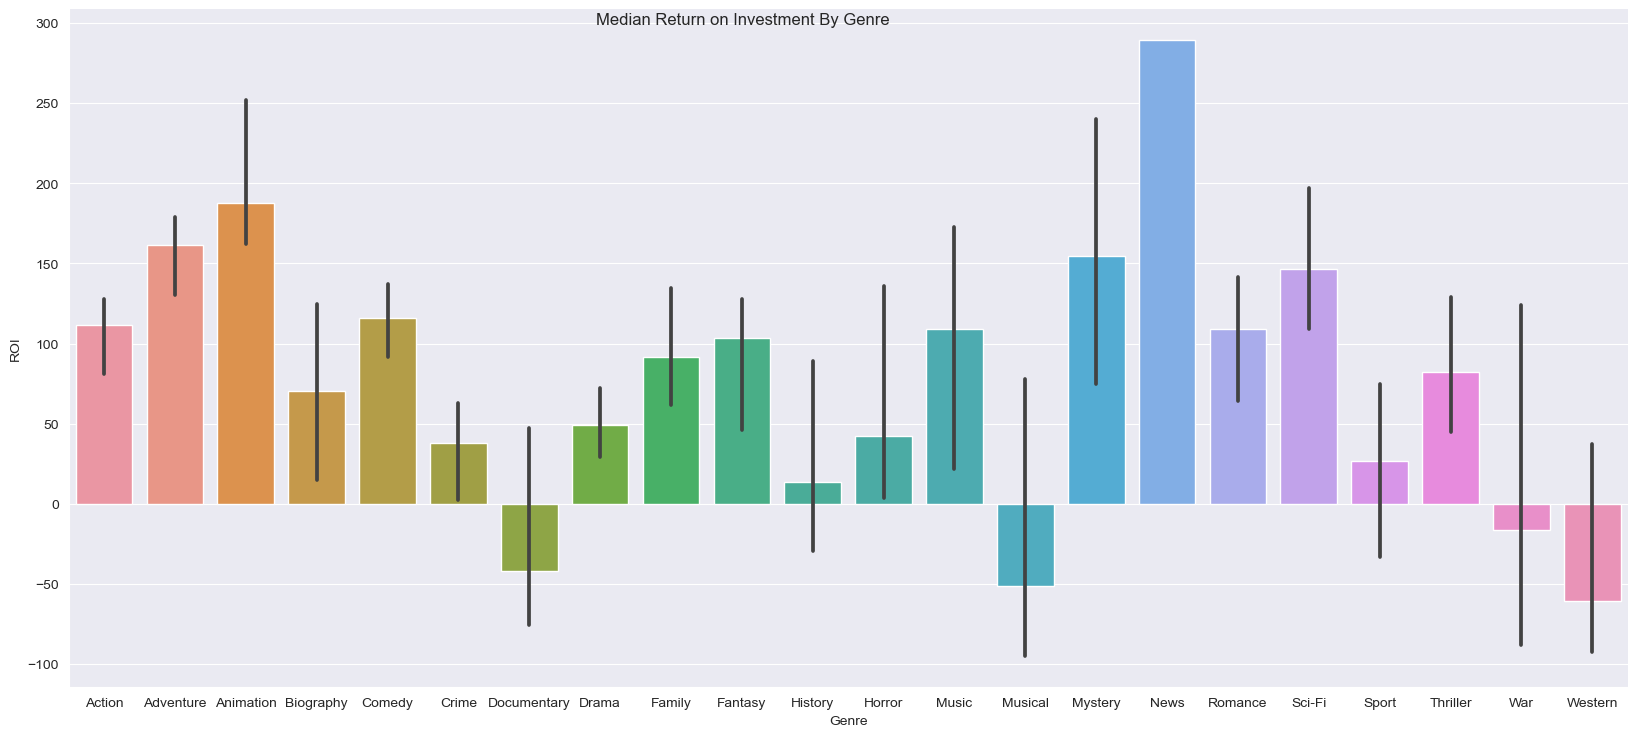

In [59]:
view_column_by_genre(
    "ROI",
    "Median Return on Investment By Genre",
    "ROI"
);

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***